In [85]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm

# Set plot style
plt.style.use('seaborn')

# Set plot size
plt.rcParams['figure.figsize'] = [20,6]

In [86]:
data = pd.read_csv('data/us-data.csv', thousands=',')
data = data[['Date','Positive']]
data

,Date,Positive
0,20200725,4158341
1,20200724,4092928
2,20200723,4017735
3,20200722,3946708
4,20200721,3877558
...,...,...
181,20200126,2
182,20200125,2
183,20200124,2
184,20200123,2


In [87]:
data['Date'] = pd.to_datetime(data['Date'].astype(str), format='%Y%m%d')
data = data.sort_values(by=['Date'], ascending=True)
data

,Date,Positive
185,2020-01-22,2
184,2020-01-23,2
183,2020-01-24,2
182,2020-01-25,2
181,2020-01-26,2
...,...,...
4,2020-07-21,3877558
3,2020-07-22,3946708
2,2020-07-23,4017735
1,2020-07-24,4092928


In [89]:
# Convert the date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the index of the DataFrame to the date column
data.set_index('Date', inplace = True)

# Print DataFrame summary
data.info()

# Print DataFrame
data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186 entries, 2020-01-22 to 2020-07-25
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Positive  186 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


,Positive
Date,
2020-01-22,2
2020-01-23,2
2020-01-24,2
2020-01-25,2
2020-01-26,2
...,...
2020-07-21,3877558
2020-07-22,3946708
2020-07-23,4017735


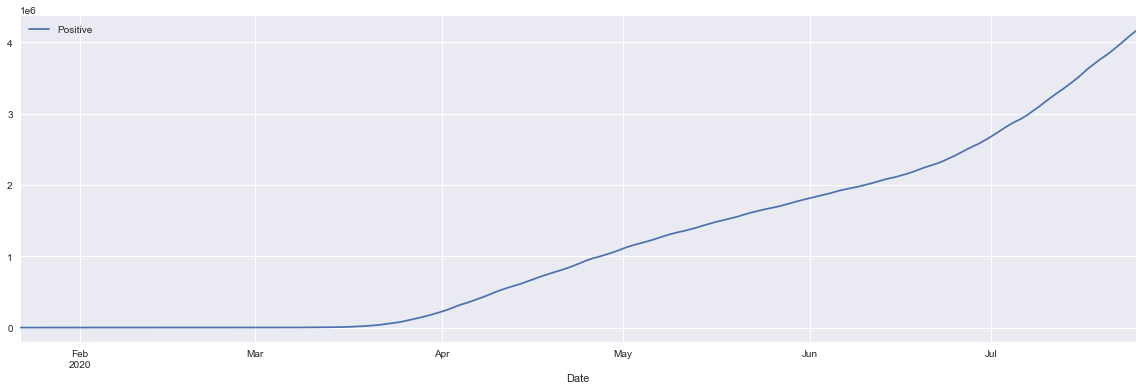

In [90]:
# Plot the series
data.plot()

In [91]:
# Resample the data to the average monthly values
data_daily = data.resample("D").mean()

# Print the head of data
print(data.head())

# Print the head of resampled data
print(data_daily.head())


Positive
Date                
2020-01-22         2
2020-01-23         2
2020-01-24         2
2020-01-25         2
2020-01-26         2
            Positive
Date                
2020-01-22         2
2020-01-23         2
2020-01-24         2
2020-01-25         2
2020-01-26         2


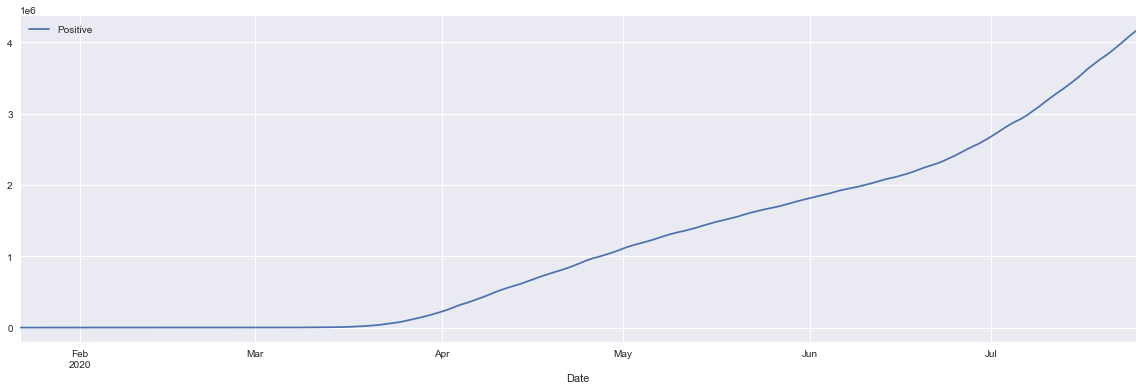

In [92]:
# Plot resampled data
data_daily.plot()

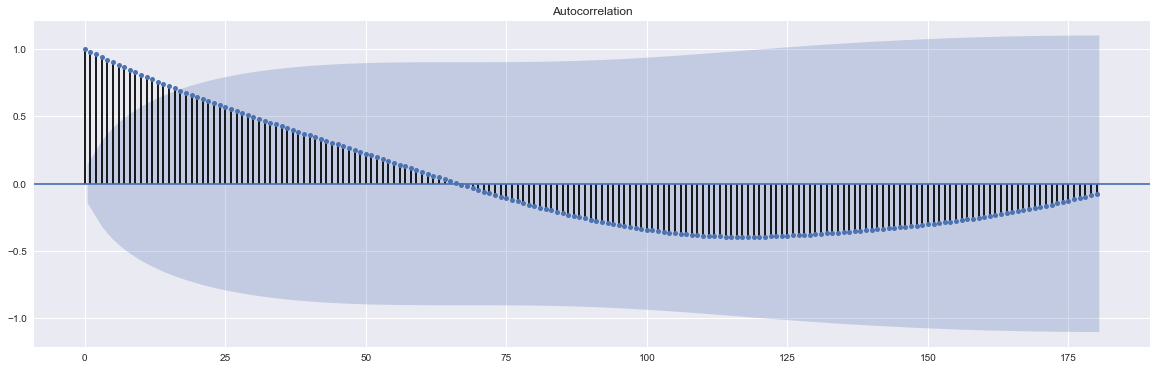

In [93]:
# Import plot_acf
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF of data_monthly
plot_acf(data_weekly, lags = 180); 

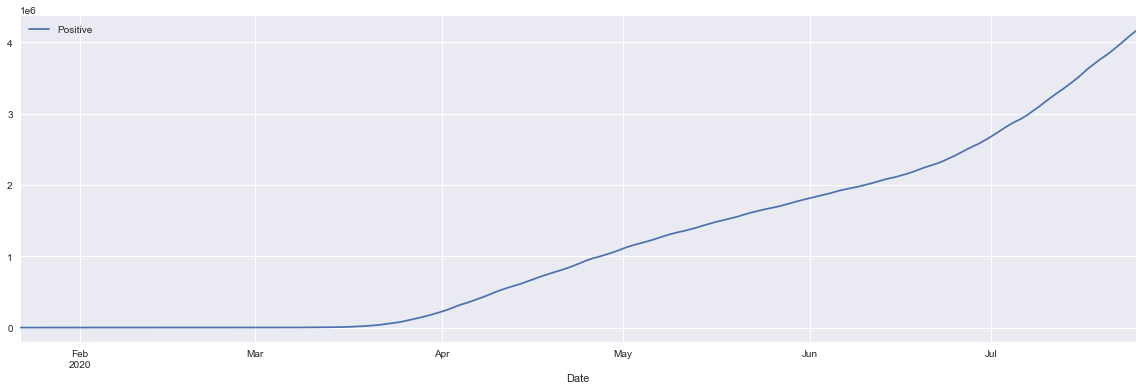

In [94]:
# Plot data_monthly again
data_daily.plot()

In [95]:
# Difference data_monthly
data_daily_diff = data_daily.diff()

# Show differenced values
data_daily_diff.head()

,Positive
Date,
2020-01-22,NaN
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0


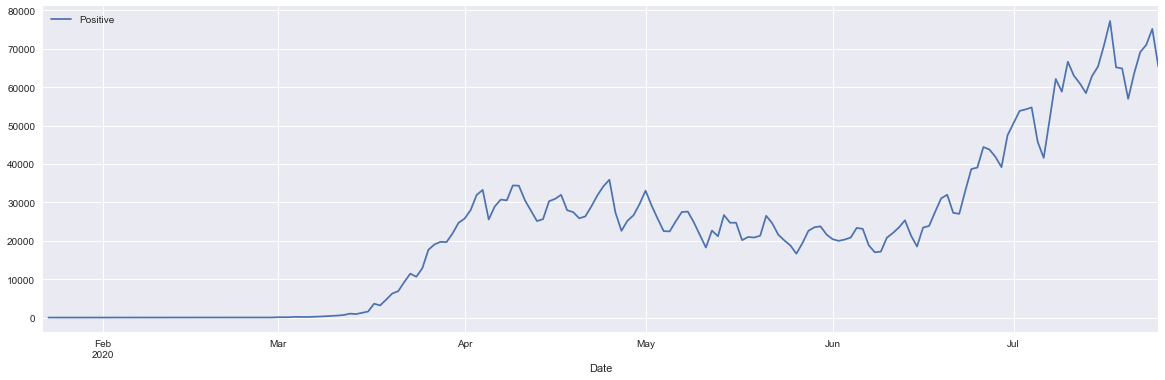

In [96]:
# Plot differenced data

data_daily_diff.plot()

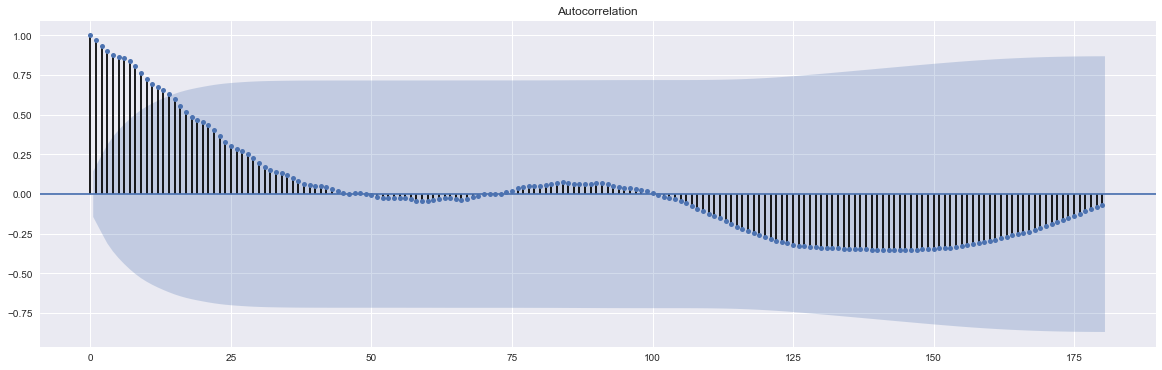

In [97]:
# Plot ACF for differenced data
plot_acf(data_daily_diff.dropna(), lags=180);

date
2020-01-21            NaN
2020-01-22            NaN
2020-01-23            NaN
2020-01-24   -2459.810612
2020-01-25   -3191.838085
2020-01-26    -818.656766
2020-01-27    1429.601476
2020-01-28    2446.991586
2020-01-29    2291.419058
2020-01-30     301.721915
Freq: D, Name: resid, dtype: float64
date
2020-07-15   -2504.009513
2020-07-16    4507.579058
2020-07-17    6214.475102
2020-07-18    1528.304772
2020-07-19    -430.085338
2020-07-20   -4089.112810
2020-07-21   -3959.722700
2020-07-22            NaN
2020-07-23            NaN
2020-07-24            NaN
Freq: D, Name: resid, dtype: float64


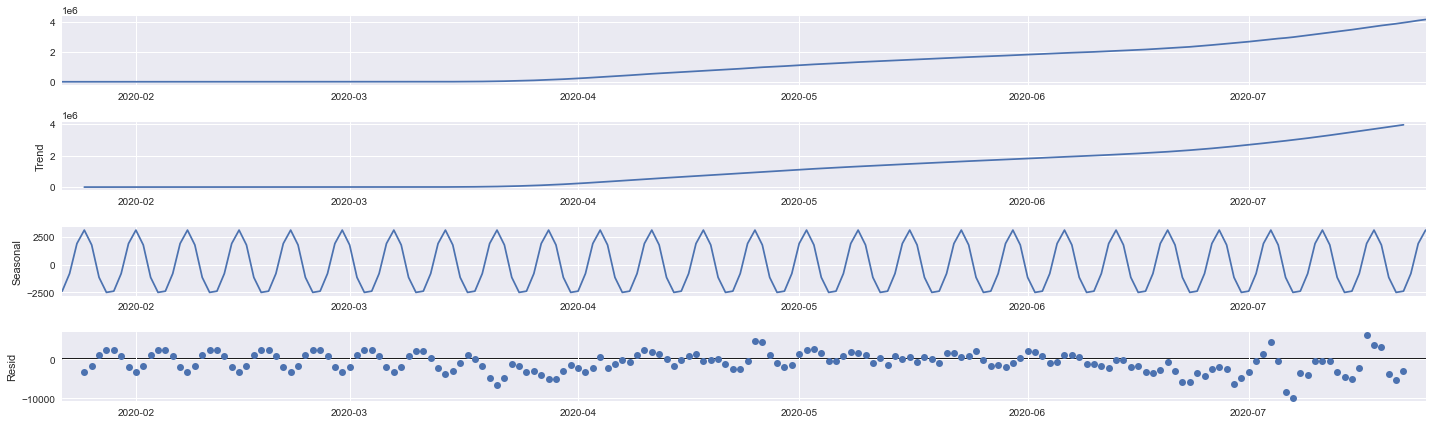

In [98]:
# Plot seasonal decomposition of data_daily again
seasonal_decompose(data_daily).plot()

# Extract residuals and save
data_daily_resid = seasonal_decompose(data_daily).resid

# Print the head and tail of the residual component
print(data_monthly_resid.head(10))
print(data_monthly_resid.tail(10))

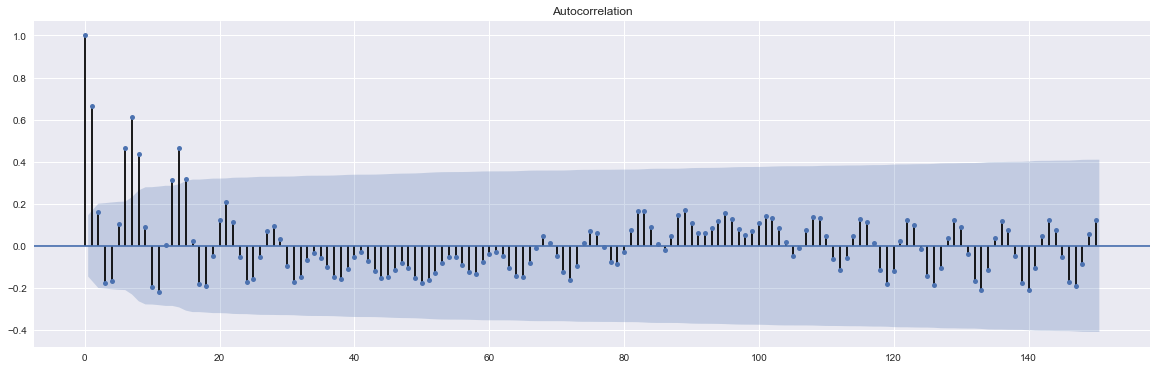

In [99]:
# Drop NaN values from residuals
data_daily_resid = data_daily_resid.dropna()

# Plot ACF of the residual component of data_monthly
plot_acf(data_daily_resid, lags=150);

In [100]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA

# Fit the model to data_monthly_diff
model = ARMA(data_daily_resid, order=(0,5))
result = model.fit()

In [101]:
# Print summary of the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  resid   No. Observations:                  180
Model:                     ARMA(0, 5)   Log Likelihood               -1584.672
Method:                       css-mle   S.D. of innovations           1604.142
Date:                Sun, 26 Jul 2020   AIC                           3183.344
Time:                        10:17:24   BIC                           3205.695
Sample:                    01-25-2020   HQIC                          3192.406
                         - 07-22-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -767.8461    290.856     -2.640      0.008   -1337.912    -197.780
ma.L1.resid     0.9867      0.075     13.166      0.000       0.840       1.134
ma.L2.resid     0.6291      0.104      6.068      0.000       0.426       0.832
ma.L3.resid     0.0504      0.116      0.434      0.664      -0.177       0.278
ma.L4.resid    -0.0319      0.089     -0.359      0.720      -0.206       0.142
ma.L5.resid    -0.1948      0.073     -2.682      0.007      -0.337      -0.052
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.9283           -0.6887j            1.1559           -0.3984
MA.2           -0.9283           +0.6887j            1.1559            0.3984
MA.3           -0.1162           -1.4078j            1.4126           -0.2631
MA.4           -0.1162           +1.4078j            1.4126            0.2631
MA.5            1.9252           -0.0000j            1.9252           -0.0000
-----------------------------------------------------------------------------
"""

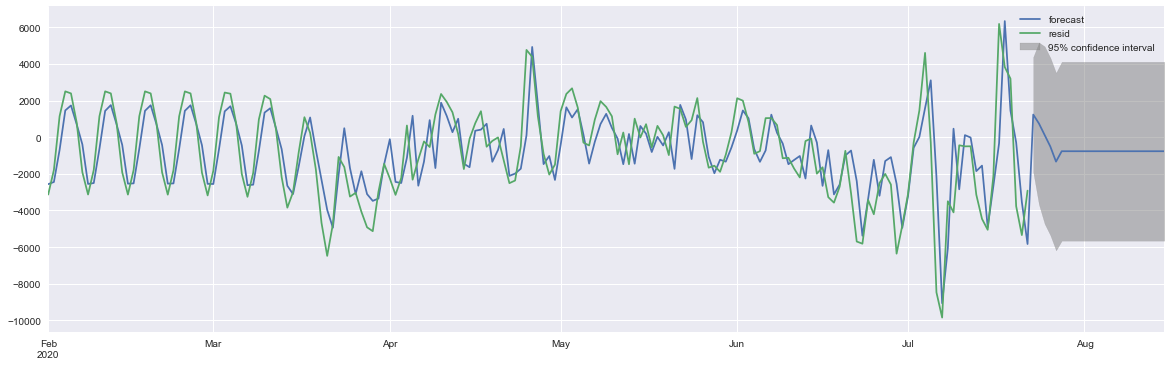

In [102]:

result.plot_predict(start="2020-02-01", end="2020-08-15");

In [111]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(data_daily['Positive'].diff().iloc[1:].values, result.predict(start=1,end=185)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 30777.12269387053.


In [113]:
# Import ARMA
from statsmodels.tsa.arima_model import ARIMA

# Fit the model to data_monthly_diff
model = ARIMA(data_daily_resid, order=(2,1,0))
result = model.fit()

# Print the summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.resid   No. Observations:                  179
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1605.493
Method:                       css-mle   S.D. of innovations           1899.918
Date:                Sun, 26 Jul 2020   AIC                           3218.985
Time:                        10:28:37   BIC                           3231.735
Sample:                    01-26-2020   HQIC                          3224.155
                         - 07-22-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.7957    143.827     -0.006      0.996    -282.692     281.100
ar.L1.D.resid     0.3189      0.071      4.465      0.000       0.179       0.459
ar.L2.D.resid    -0.3080      0.072     -4.302      0.000      -0.448      -0.168
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5177           -1.7260j            1.8020           -0.2036
AR.2            0.5177           +1.7260j            1.8020            0.2036
-----------------------------------------------------------------------------
"""

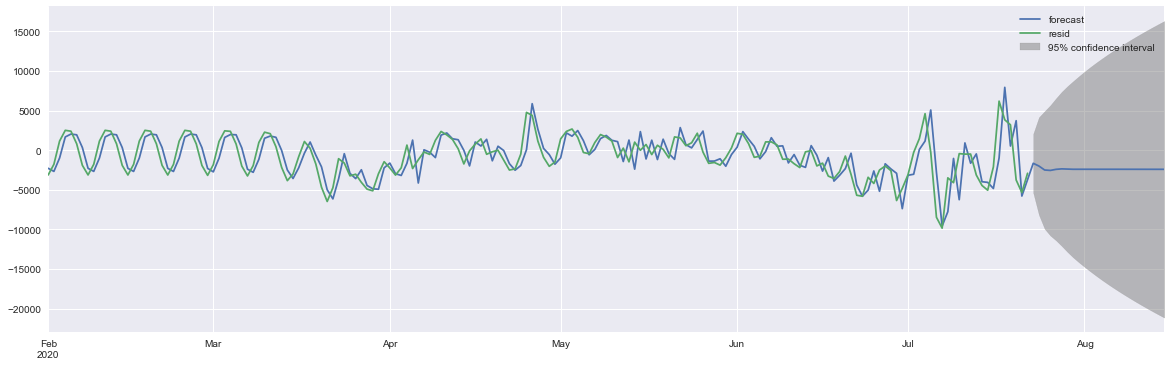

In [114]:
result.plot_predict(start="2020-02-01", end="2020-08-15");

In [115]:
rmse = math.sqrt(mean_squared_error(data_daily['Positive'].diff().iloc[1:].values, result.predict(start=1,end=185)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 30088.17003675548.
